In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import nltk
import re
import langid

from string import punctuation

import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tweepy
import sys

In [3]:
consumerKey = "xxxxxxxxxxxxxxxxxxxxx"
consumerSecret = "xxxxxxxxxxxxxxxxxxxxxxx"
accessToken = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
accessTokenSecret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

api_key = consumerKey
api_key_secret = consumerSecret
access_token = accessToken
access_token_secret = accessTokenSecret

In [4]:
auth_handler = tweepy.OAuthHandler(consumer_key= api_key, consumer_secret= api_key_secret)
auth_handler.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler)

In [12]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets= tweepy.Cursor(api.search_tweets, q=keyword, lang="en").items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:

 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity

 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1

 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Bali
Please enter how many tweets to analyze: 150


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

In [13]:
df = pd.DataFrame(tweet_list)

In [14]:
df

,0
0,Can’t believe bali trip is ending
1,RT @Rainmaker1973: A dive in the Pacific Ocean...
2,@XXS79 @Gonzohall @levelsio Should not become ...
3,"@chrisluxonmp Build the prisons in bali, and p..."
4,Counting down the days to Bali 10 days nalang!...
...,...
145,RT @theNFT_Pilot: Thank you to Kings Cut from ...
146,RT @TravelAndLove: The beauty of Canggu in Bal...
147,Thank you to Kings Cut from @SuperlativeSS for...
148,RT @aew1aew1: 27/6/26. Bali D et al. The impac...


In [15]:
import re
import pandas as pd

from string import punctuation

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

df[0].map(preprocess_text)

0                      can’t believe bali trip is ending
1      rt rainmaker1973 a dive in the pacific ocean o...
2        xxs79 gonzohall levelsio should not become bali
3      chrisluxonmp build the prisons in bali and pay...
4      counting down the days to bali 10 days nalang🤩...
                             ...                        
145    rt thenftpilot thank you to kings cut from sup...
146    rt travelandlove the beauty of canggu in bali ...
147    thank you to kings cut from superlativess for ...
148    rt aew1aew1 27626 bali d et al the impact of t...
149    soniasikka4 it probably not from india it migh...
Name: 0, Length: 150, dtype: object

In [16]:
import pandas as pd
import re
import string


def clean_tweet(tweet):
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove hashtags and keep only the text
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove special characters and punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)



    # Convert to lowercase
    tweet = tweet.lower()

    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet)

    return tweet.strip()



# Clean tweets in the DataFrame
df[0] = df[0].apply(clean_tweet)

# Print the cleaned tweets
print(df[0])

0                       cant believe bali trip is ending
1      rt a dive in the pacific ocean of plastic how ...
2                                 should not become bali
3      build the prisons in bali and pay c on the dol...
4             counting down the days to bali days nalang
                             ...                        
145    rt thank you to kings cut from for making a dr...
146    rt the beauty of canggu in bali takes your bre...
147    thank you to kings cut from for making a dream...
148    rt bali d et al the impact of the endocrine di...
149    it probably not from india it might be from hi...
Name: 0, Length: 150, dtype: object


In [17]:
import pandas as pd
import langid

def is_english(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

# Filter non-English tweets in the DataFrame
df = df[df[0].apply(is_english)]

# Print the filtered DataFrame
print(df[0])

0                       cant believe bali trip is ending
1      rt a dive in the pacific ocean of plastic how ...
2                                 should not become bali
3      build the prisons in bali and pay c on the dol...
4             counting down the days to bali days nalang
                             ...                        
145    rt thank you to kings cut from for making a dr...
146    rt the beauty of canggu in bali takes your bre...
147    thank you to kings cut from for making a dream...
148    rt bali d et al the impact of the endocrine di...
149    it probably not from india it might be from hi...
Name: 0, Length: 124, dtype: object


In [18]:
df.drop_duplicates(subset= 0, inplace=True)

# Print the updated DataFrame
print(df[0])

0                       cant believe bali trip is ending
1      rt a dive in the pacific ocean of plastic how ...
2                                 should not become bali
3      build the prisons in bali and pay c on the dol...
4             counting down the days to bali days nalang
                             ...                        
143          wts aab pc nct aespa wayv the boyz dom bali
145    rt thank you to kings cut from for making a dr...
147    thank you to kings cut from for making a dream...
148    rt bali d et al the impact of the endocrine di...
149    it probably not from india it might be from hi...
Name: 0, Length: 87, dtype: object


<ipython-input-18-f510485665c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset= 0, inplace=True)


In [19]:
df = df[~df[0].str.startswith('rt')]

# Print the updated DataFrame
df

,0
0,cant believe bali trip is ending
2,should not become bali
3,build the prisons in bali and pay c on the dol...
4,counting down the days to bali days nalang
8,wts aab pc nct dom bali
9,months til bali and i cannot wait this melbour...
10,will definitely come back to sista when i go t...
15,probably waiting for the server to bring my dr...
21,this timmy time playlist is about to be twice ...
22,bali calling with students


In [20]:
df['sentiment'] = df[0].apply(lambda x: TextBlob(x).sentiment.polarity)

In [21]:
df

,0,sentiment
0,cant believe bali trip is ending,0.000000
2,should not become bali,0.000000
3,build the prisons in bali and pay c on the dol...,0.000000
4,counting down the days to bali days nalang,-0.155556
8,wts aab pc nct dom bali,0.000000
9,months til bali and i cannot wait this melbour...,0.000000
10,will definitely come back to sista when i go t...,0.000000
15,probably waiting for the server to bring my dr...,0.000000
21,this timmy time playlist is about to be twice ...,0.200000
22,bali calling with students,0.000000


In [22]:
# Function to classify sentiment scores into classes
def get_sentiment_class(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Create a new column for sentiment class
df['sentiment_class'] = df['sentiment'].apply(get_sentiment_class)

# Print the updated DataFrame
df

,0,sentiment,sentiment_class
0,cant believe bali trip is ending,0.000000,neutral
2,should not become bali,0.000000,neutral
3,build the prisons in bali and pay c on the dol...,0.000000,neutral
4,counting down the days to bali days nalang,-0.155556,negative
8,wts aab pc nct dom bali,0.000000,neutral
9,months til bali and i cannot wait this melbour...,0.000000,neutral
10,will definitely come back to sista when i go t...,0.000000,neutral
15,probably waiting for the server to bring my dr...,0.000000,neutral
21,this timmy time playlist is about to be twice ...,0.200000,positive
22,bali calling with students,0.000000,neutral


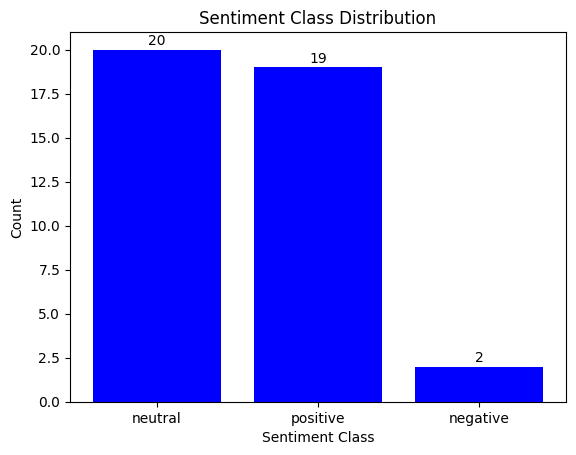

In [23]:
# Count the number of tweets in each sentiment class
class_counts = df['sentiment_class'].value_counts()

# Plot the histogram
plt.bar(range(len(class_counts)), class_counts, color='blue')

# Customize the plot
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Sentiment Class Distribution')
plt.xticks(range(len(class_counts)), class_counts.index)
plt.ylim(0, max(class_counts) + 1)

# Add text labels with counts above each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()